<a href="https://colab.research.google.com/github/sivareddy147/APPLIED-DATA-MODELLING-AND-DEEP-LEARNING-FOR-ENGINEERS/blob/main/EXPERIMENT%20-1AND%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total time spanning: 0.3 days
0.458 % of all transactions are fraud. 


<ipython-input-4-d9b22ef9f848>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  (sns.distplot)(df[cn][df.Class ==1], bins=50)
<ipython-input-4-d9b22ef9f848>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class ==0], bins=50)
<ipython-input-4-d9b22ef9f848>:25: UserWarning: 

`distplot` is a depr

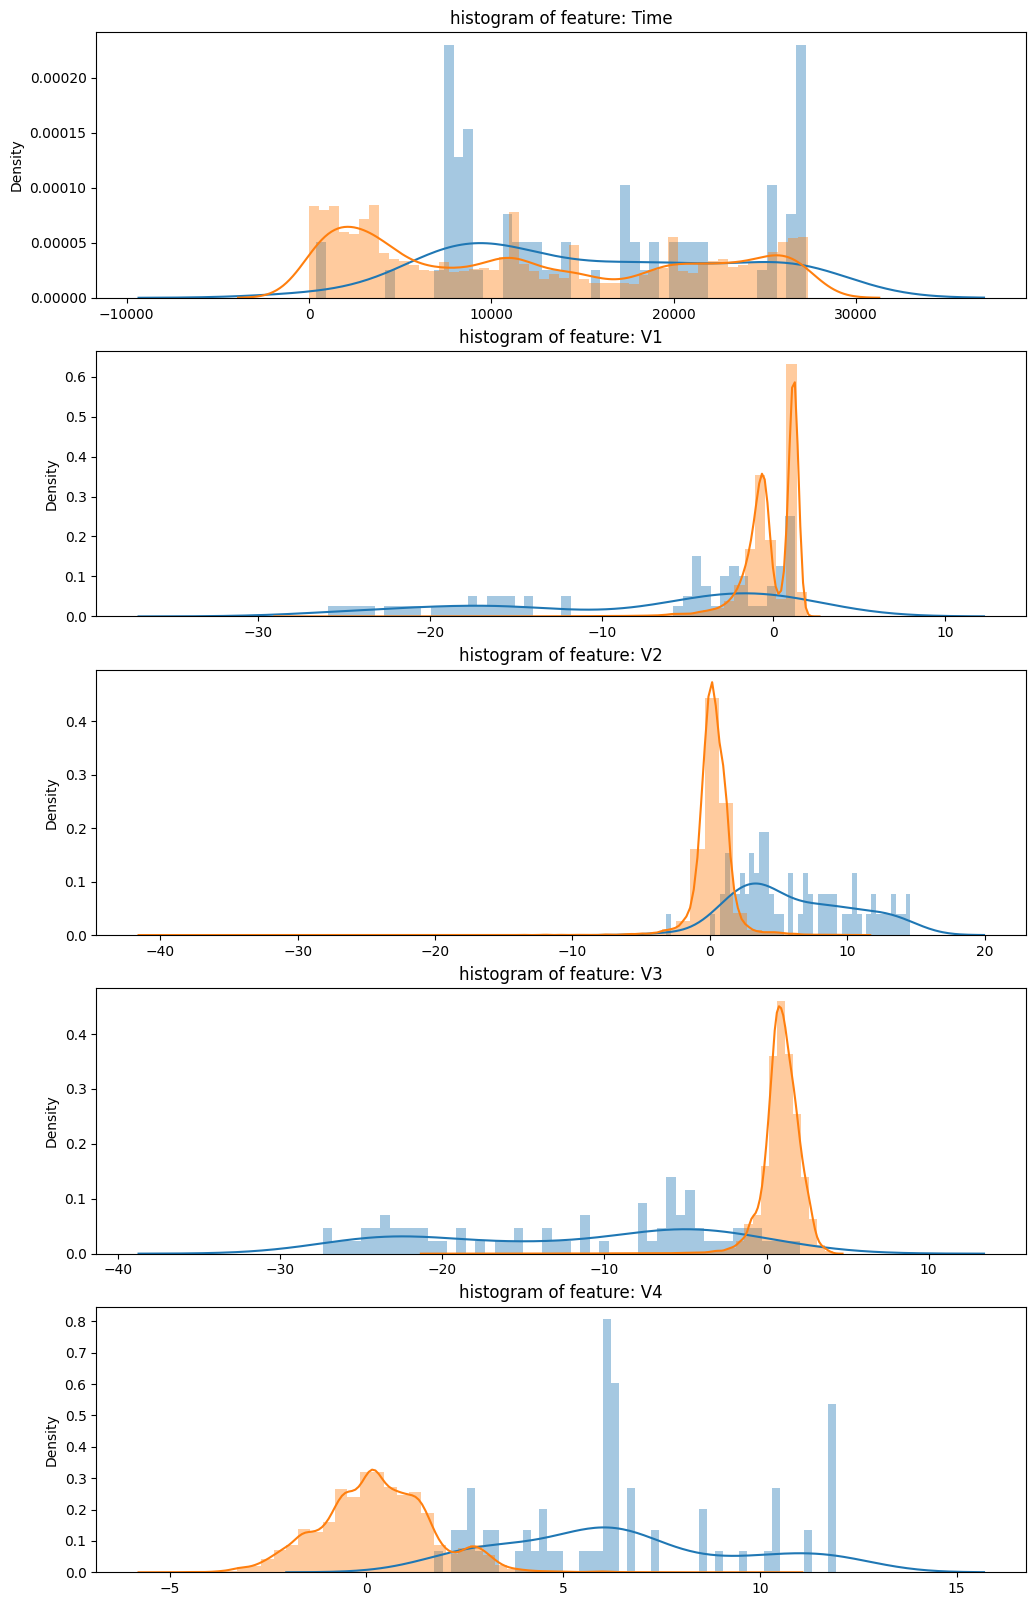

Total train examples: 11952, total fraud cases: 52.0, equal to 0.00435 of total cases. 
Total test examples: 3984, total fraud cases: nan, equal to nan of total cases. 
Epoch: 0001 cost= 2.098411083 Train auc= 0.948525 Time elapsed= 0:00:00.135673
Epoch: 0002 cost= 1.729523540 Train auc= 0.949688 Time elapsed= 0:00:00.242890
Epoch: 0003 cost= 1.219029307 Train auc= 0.960352 Time elapsed= 0:00:00.345415
Epoch: 0004 cost= 1.153808713 Train auc= 0.960100 Time elapsed= 0:00:00.427962
Epoch: 0005 cost= 1.137789011 Train auc= 0.961858 Time elapsed= 0:00:00.520096
Epoch: 0006 cost= 0.716198504 Train auc= 0.968605 Time elapsed= 0:00:00.622136
Epoch: 0007 cost= 0.588374078 Train auc= 0.974095 Time elapsed= 0:00:00.746769
Epoch: 0008 cost= 0.926172376 Train auc= 0.977132 Time elapsed= 0:00:00.880825
Epoch: 0009 cost= 0.752357960 Train auc= 0.976986 Time elapsed= 0:00:01.008901
Epoch: 0010 cost= 0.572608113 Train auc= 0.978222 Time elapsed= 0:00:01.128475
Optimization Finished!
Model saved in fil

In [4]:
#Exp-1 Credit card fraud detection system
#G.C.SIVA REDDY-9921005147
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import os
from datetime import datetime
from sklearn.metrics import roc_auc_score as auc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
df = pd.read_csv('creditcard.csv')
df.shape
print("Total time spanning: {:.1f} days".format(df['Time'].max() / (3600 * 24.0)))
print("{:.3f} % of all transactions are fraud. ".format(np.sum(df['Class']) / df.shape[0]* 100))
df.head()
df.columns
df.dtypes
plt.figure(figsize=(12,5*4))
gs= gridspec.GridSpec(5,1)
for i, cn in enumerate(df.columns[:5]):
    ax= plt.subplot(gs[i])
    (sns.distplot)(df[cn][df.Class ==1], bins=50)
    sns.distplot(df[cn][df.Class ==0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+ str(cn))
plt.show()
TEST_RATIO = 0.25
df.sort_values('Time', inplace = True)
TRA_INDEX = int((1-TEST_RATIO) * df.shape[0])
train_x = df.iloc[:TRA_INDEX, 1:-2].values
train_y = df.iloc[:TRA_INDEX, -1].values
test_x = df.iloc[TRA_INDEX:, 1:-2].values
test_y = df.iloc[TRA_INDEX:, -1].values
print("Total train examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(train_x.shape[0], np.sum(train_y), np.sum(train_y)/train_x.shape[0]))
print("Total test examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(test_x.shape[0], np.sum(test_y), np.sum(test_y)/test_y.shape[0]))
cols_max = []
cols_min = []
for c in range(train_x.shape[1]):
    cols_max.append(train_x[:,c].max())
    cols_min.append(train_x[:,c].min())
    train_x[:, c] = (train_x[:, c] - cols_min[-1]) / (cols_max[-1] - cols_min[-1])
    test_x[:, c] = (test_x[:, c] - cols_min[-1]) / (cols_max[-1] - cols_min[-1])
cols_mean = []
cols_std = []
for c in range(train_x.shape[1]):
    cols_mean.append(train_x[:,c].mean())
    cols_std.append(train_x[:,c].std())
    train_x[:, c] = (train_x[:, c] - cols_mean[-1]) / cols_std[-1]
    test_x[:, c] = (test_x[:, c] - cols_mean[-1]) / cols_std[-1]
learning_rate = 0.01
training_epochs = 10
batch_size = 256
display_step = 1
n_hidden_1 = 15
n_input = train_x.shape[1]
X = tf.placeholder("float", [None, n_input])
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    # 'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    # 'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    # 'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_input])),
    # 'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}
# Building the encoder


def encoder(x):
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['encoder_h1']),biases['encoder_b1']))
    return layer_1


def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['decoder_h1']),
                                biases['decoder_b1']))
    return layer_1

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
y_pred = decoder_op
y_true = X
batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
save_model = os.path.join("C:\\Users\\anwar\Desktop\\New folder",'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    now = datetime.now()
    sess.run(init)
    total_batch = int(train_x.shape[0] / batch_size)
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_idx = np.random.choice(train_x.shape[0], batch_size)
            batch_xs = train_x[batch_idx]
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        if epoch % display_step == 0:
          train_batch_mse = sess.run(batch_mse, feed_dict={X: train_x})
          print("Epoch:", '%04d' % (epoch + 1),"cost=", "{:.9f}".format(c),"Train auc=", "{:.6f}".format(auc(train_y, train_batch_mse)),"Time elapsed=", "{}".format(datetime.now() - now))
          save_path = saver.save(sess, save_model)
print("Optimization Finished!")
print("Model saved in file: %s" % save_path)
#G.C.SIVA REDDY-9921005147

{{hlist|Electronics|Movies and music|Home and furniture|Home improvement|Clothing|Footwear|Jewelry|Toys|Health and beauty|Pet supplies|Sporting goods and fitness|Auto|Photo finishing|Craft supplies|Party supplies|Grocery}}


{{Unbulleted list
  | [[Crude oil]]
  | [[Oil products]]
  | [[Natural gas]]
  | [[Petrochemical]]s
  | [[Power generation]]}}


[[Investment|Diversified investments]], [[Insurance#Types|Property & casualty insurance]], [[Public utility|Utilities]], [[Restaurants]], [[Food processing]], [[Aerospace]], [[Toys]], [[Mass media|Media]], [[Automotive industry|Automotive]], [[Sports equipment|Sporting goods]], [[Final good|Consumer products]], [[Internet]], [[Real estate]]


['furniture', 'auto', 'toys', 'beauty', 'clothing', 'footwear', 'jewelry', 'grocery', 'party supplies', 'music', 'pet supplies', 'photo finishing', 'health', 'home improvement', 'craft supplies', 'movies', 'electronics', 'fitness', 'sporting goods', 'home', 'crude oil', 'oil products', 'natural gas',

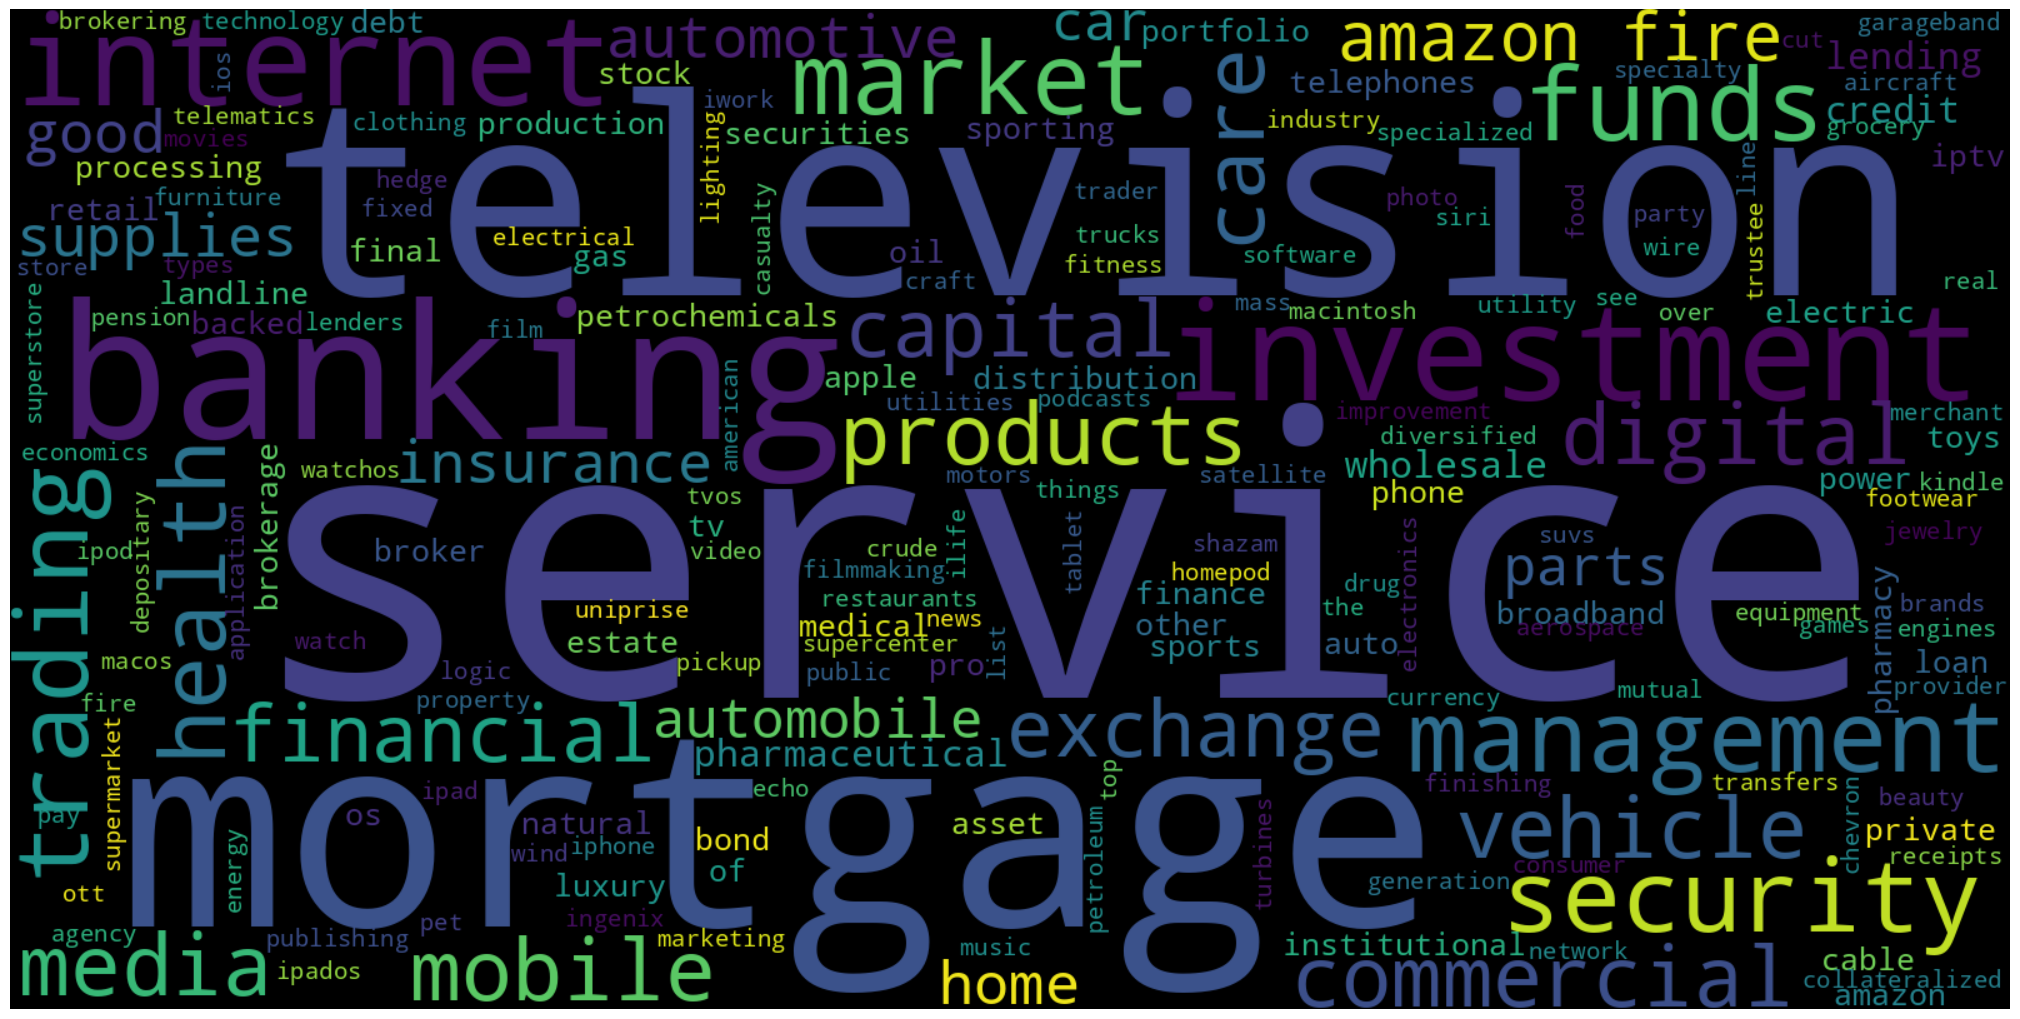

[[Retail]]
[[Energy industry|Energy]]: [[Oil and gas industry|Oil and gas]]
[[Conglomerate (company)|Conglomerate]]
{{Unbulleted list | [[Computer hardware]] | [[Computer software]] | [[Consumer electronics]] | [[Cloud computing]] | [[Digital distribution]] | [[Fabless manufacturing|Fabless silicon design]] | [[Semiconductors]] | [[Financial technology]] | [[Artificial intelligence]]}}
[[Managed health care]]
['retail', 'gas', 'oil', 'energy industry', 'energy', 'gas industry', 'conglomerate', 'company', 'semiconductors', 'financial technology', 'computer software', 'computer hardware', 'fabless silicon design', 'fabless manufacturing', 'artificial intelligence', 'digital distribution', 'consumer electronics', 'cloud computing', 'managed health care', 'healthcare', 'retail', 'health care', 'grocery stores', 'e-commerce', 'artificial intelligence', 'digital distribution', 'consumer electronics', 'cloud computing', 'mass media', 'entertainment', 'technology', 'telecommunications', 'telec

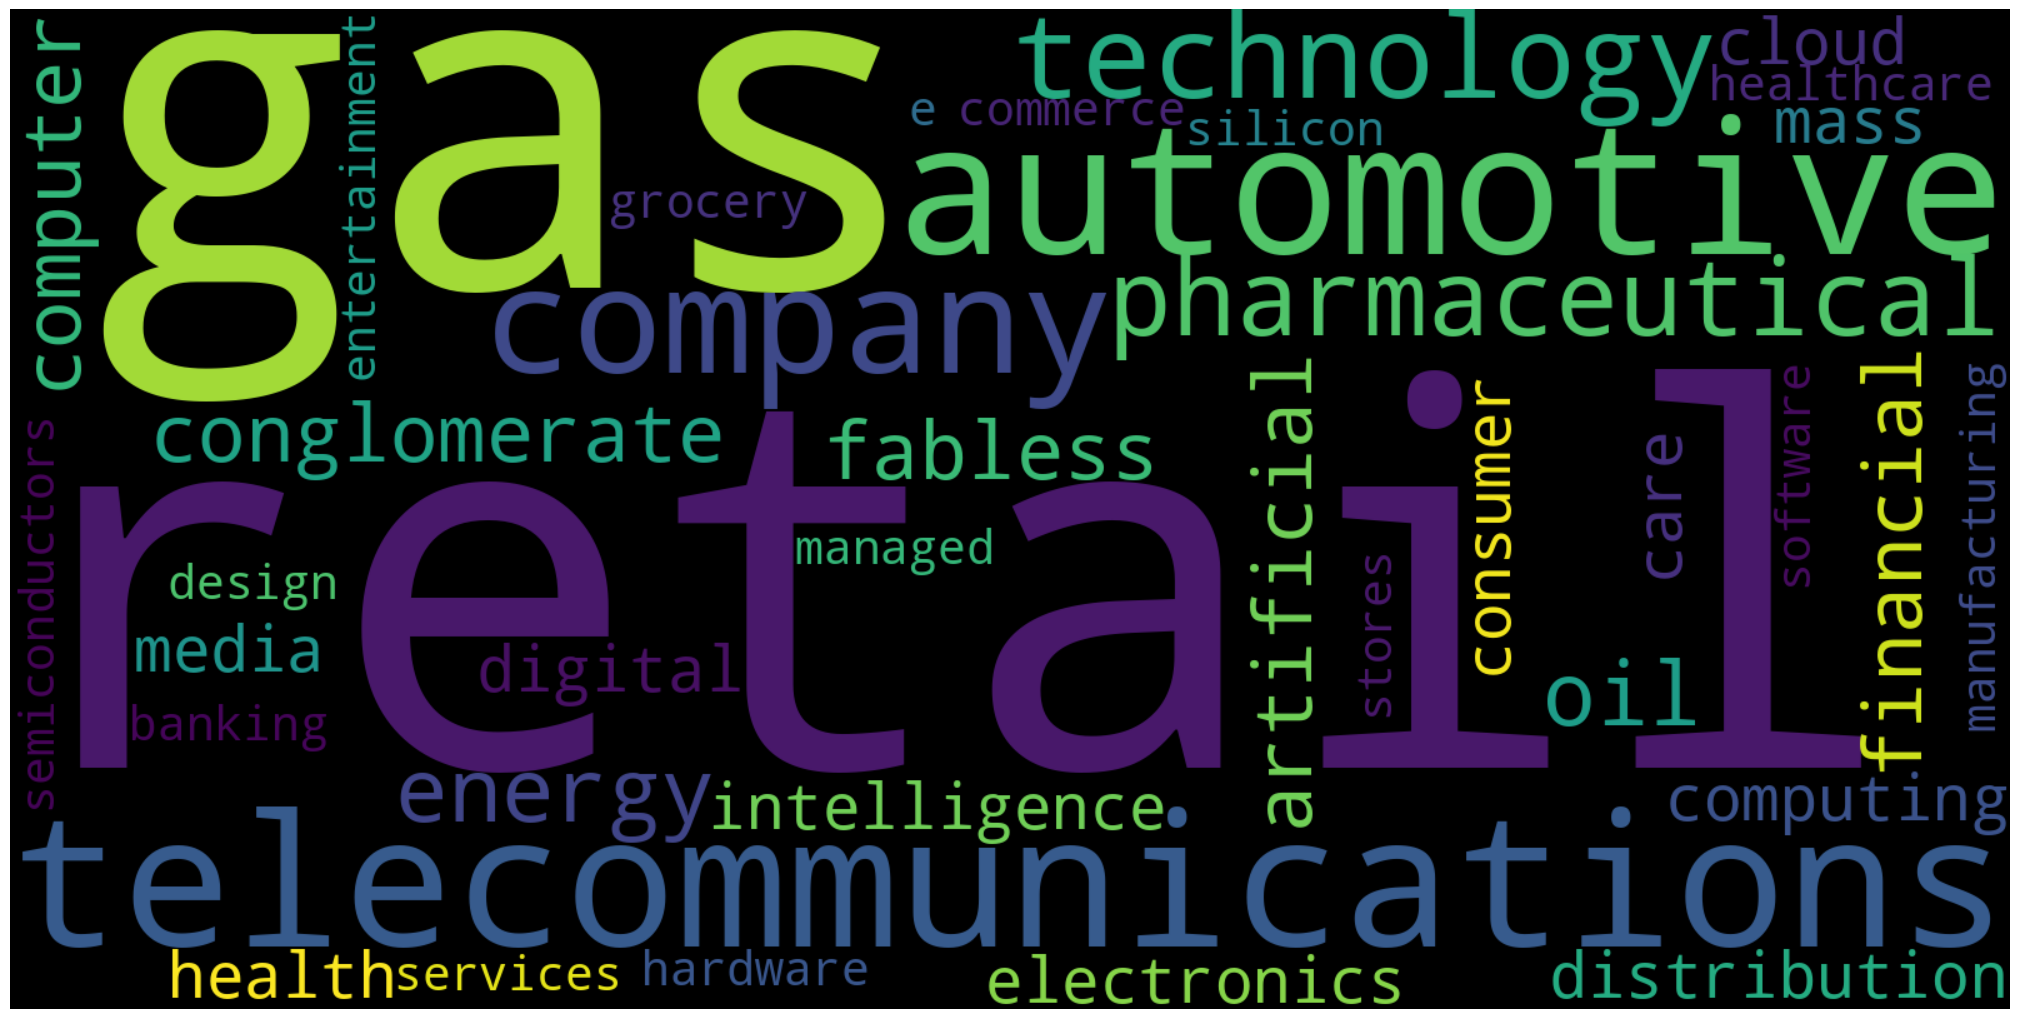

{{increase}} {{US$|219.295 billion}} (2019)
{{Nowrap|Decrease| |US$|346.2 billion|ref| name="201310K"}} {{Decrease}} {{US$|346.2 billion}}
{{increase}} US$707.8 billion (2018)
{{Decrease}} {{US$|338.516&nbsp;billion}}
{{increase}} $173.889 billion (2019)
{{nowrap|increase| |US$|60.381 billion| |small|(2018)|ref| name=FY}} {{increase}} {{US$|60.381 billion}} {{small|(2018)}}
{{increase}} {{US$|196.456 billion}}
{{decrease}} {{US$|162.648 billion}}
{{increase}} {{US$|link|=|yes}} 531 billion     (2018)
{{increase}} US$227.339 billion {{small|(2018)}}
{{decrease}} {{US$|256.54 billion}} {{small|(2018)}}
{{increase}} {{US$|37.66 billion}} (2018)
{{decrease}} {{US$|253.9 billion}} {{small|(2018)}}
{{increase}} US$39.95 billion {{small|(2018)}}
{{increase}} US$45.40 billion
{{increase}} {{US$|264.82 billion}}
{{increase}} {{US$|38.11 billion}} (2019)
{{nowrap|Decrease| US$ 309.129 billion |small|(2018)}} {{Decrease}} US$ 309.129 billion {{small|(2018)}}
{{decrease}} {{US$|67.59 billion}}
{{i

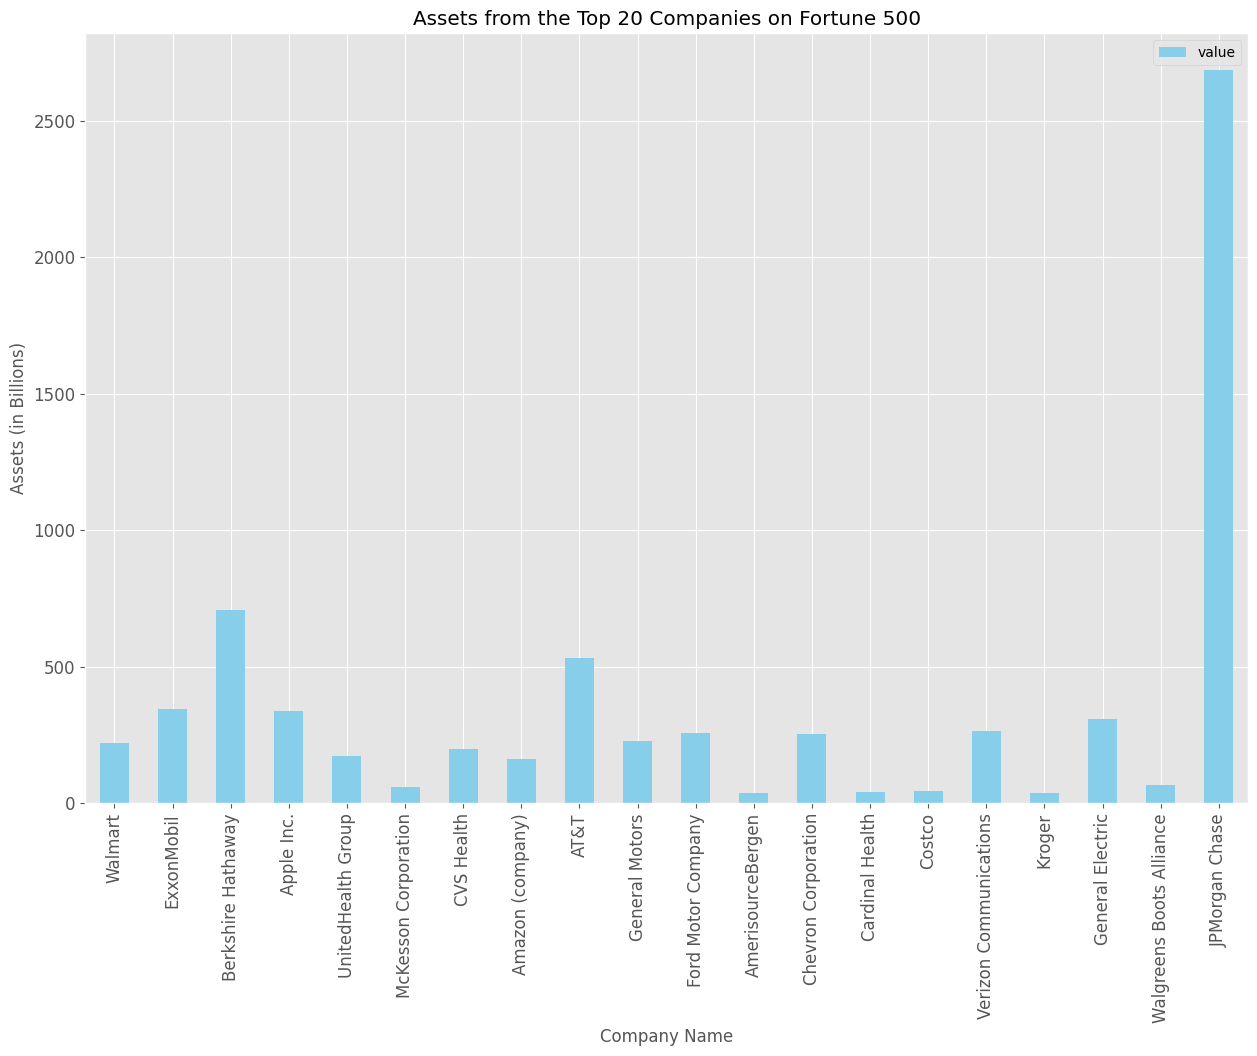

In [5]:
#Exp-2 Wrangling and Analysis Solution
#G.C.SIVA REDDY-9921005147
import re
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import urllib.request
url = 'https://raw.githubusercontent.com/MonashDataFluency/python-web-scraping/master/data/infoboxes.json'
urllib.request.urlretrieve(url, 'infoboxes.json')
with open('infoboxes.json', 'r') as file:
  wiki_data = json.load(file)
wiki_data[0]
for i in range(0,3):
 print(wiki_data[i]['products'])
 print('\n')
regex = re.compile(r'[\w\s-]+')
rogue_words = ['unbulleted list', 'hlist', 'flat list', 'flatlist', 'plainlist', 's', 'br', '']
products = []
data = []
for x in wiki_data:
  product = x['products'].lower()
  product = product.replace(' and ', '|').replace(']]', '')
  product = regex.findall(product) # extract all alphanumeric occurences
  product = [p.strip() for p in product] # get rid of leading or trailing whitespace
  # filter rogue words and de-duplicate
  product = list(set([p for p in product if p not in rogue_words]))
  # add to data
  data.append({'wiki_title' : x['company_name'], 'product' : ', '.join(product)})
  # add to list of products
  products.extend(product)
print(products)

def create_wordcloud(items, stopwords=[]):
  text = ' '.join(items)
  wordcloud = WordCloud(width=1600, height=800, margin=0, stopwords=stopwords).generate(text)
  plt.figure( figsize=(20,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()
create_wordcloud(products)
for i in range(0,5):
  print(wiki_data[i]['industry'])
  industries = []
for i, x in enumerate(wiki_data):
  industry = x['industry'].lower()
  industry = industry.replace(' and ', '|').replace(']]', '')
  industry = regex.findall(industry)
  industry = [i.strip() for i in industry]
  industry = list(set([i for i in industry if i not in rogue_words]))
  data[i]['industry'] = ', '.join(industry)
  industries.extend(industry)
print(industries)
create_wordcloud(industries, ['industry']) # adding "industry" to the stopword list
for i in range(0,len(wiki_data)):
  print(wiki_data[i]['assets'])
  regex1 = re.compile('([\d\.]+)')
  regex2 = re.compile('(billion|trillion)')
  assets = []
for i, x in enumerate(wiki_data):
  y = x['assets'] # get assets
  z = regex1.findall(y)[0] # extract assets
  unit = regex2.findall(y)[0] # extract the unit
  asset = float(z) # convert to the numeric
  data[i]['assets'] = str(asset) + ' ' + unit # add to data
  # add to list of assets
  assets.append({'company' : x['company_name'], 'value' : asset, 'unit' : unit})
assets
for i, asset in enumerate(assets):
  if asset['unit'] == 'trillion':
    assets[i]['value'] = asset['value'] * 1000
    assets[i]['unit'] = 'billion'
df_assets = pd.DataFrame(assets)
df_assets
ax = df_assets.plot(kind='bar', title ="Assets from the Top 20 Companies on Fortune 500",color='skyblue',figsize=(15, 10), legend=True, fontsize=12)
ax.set_xticklabels(df_assets.company)
ax.set_xlabel("Company Name", fontsize=12)
ax.set_ylabel("Assets (in Billions)", fontsize=12)
plt.show()
df_wiki = pd.DataFrame(data)
df_wiki.head()
url = 'https://raw.githubusercontent.com/MonashDataFluency/python-web-scraping/master/data/fortune_500_companies.csv'
urllib.request.urlretrieve(url, 'fortune_500_companies.csv')
df = pd.read_csv('fortune_500_companies.csv', nrows=20)
df = pd.concat([df, df_wiki], axis=1)
df
df.to_csv('top_20_companies.csv', index=False)
#G.C.SIVA REDDY- 9921005147